<a href="https://colab.research.google.com/github/jirvingphd/fsds_100719_cohort_notes/blob/master/Visualization_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with Matplotlib, Seaborn, and Pandas

## Learning Objectives

- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')

-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>


    
- Seaborn and Pandas plots can be updated with matplotlib commands's OOP type of commands (`ax.set_title()`)



# INTRO TO MATPLOTLIB


In [132]:
## Timing the installation of cohort package [+ bs_ds (for dependencies)]
from pandas import datetime
from IPython.display import clear_output

# Get the current time
start = datetime.now()

## pip install cohort package, bs_ds
!pip install -U fsds_100719

clear_output()
end = datetime.now()
print(f'\n[i] Installation of packages took: {end-start} sec.')

import warnings
warnings.filterwarnings('ignore')

from fsds_100719.imports import *


[i] Installation of packages took: 0:00:02.615693 sec.


In [133]:
df = fs.datasets.load_data('boston')
display(df.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Matplotlib Styles

You can specify a style sheet for pandas, which will change the default visual style for all plots. 
- [Visit the gallery for a preview of the styles available.](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

```python
import matplotlib.pyplot as plt
plt.style.use('style-name')
```

Use a context` block to apply a style to that figure only:
```python
with plt.style.context('style-name'):
    plt.plot()
```

In [140]:
print("[i] Available matplotlib styles:")
[print('\t',x) for x in plt.style.available];

[i] Available matplotlib styles:
	 grayscale
	 seaborn-talk
	 seaborn-deep
	 seaborn-poster
	 seaborn-white
	 seaborn-pastel
	 seaborn-whitegrid
	 seaborn-ticks
	 seaborn-darkgrid
	 classic
	 ggplot
	 seaborn-paper
	 seaborn
	 seaborn-notebook
	 fivethirtyeight
	 seaborn-dark-palette
	 seaborn-dark
	 _classic_test
	 tableau-colorblind10
	 Solarize_Light2
	 seaborn-bright
	 seaborn-colorblind
	 dark_background
	 bmh
	 fast
	 seaborn-muted


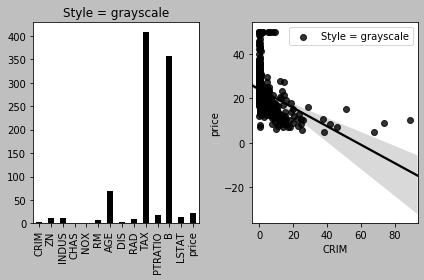

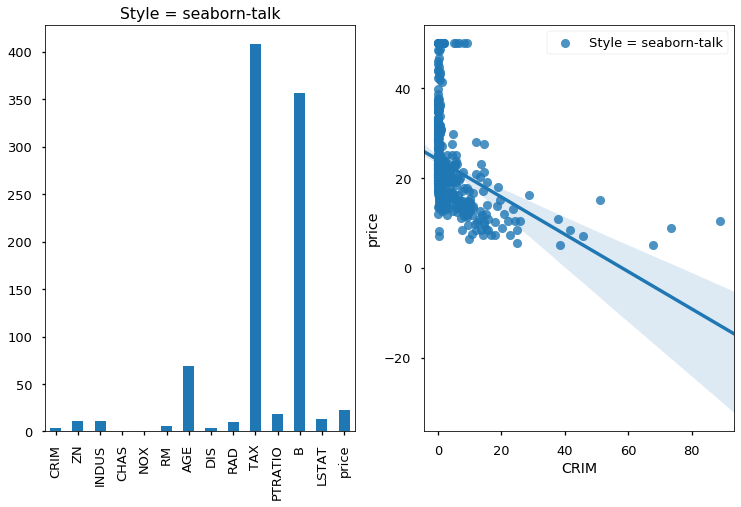

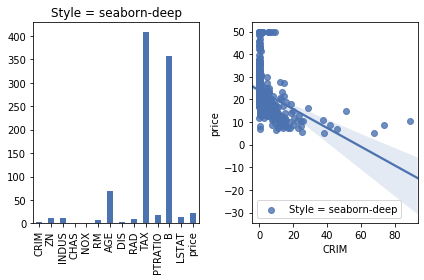

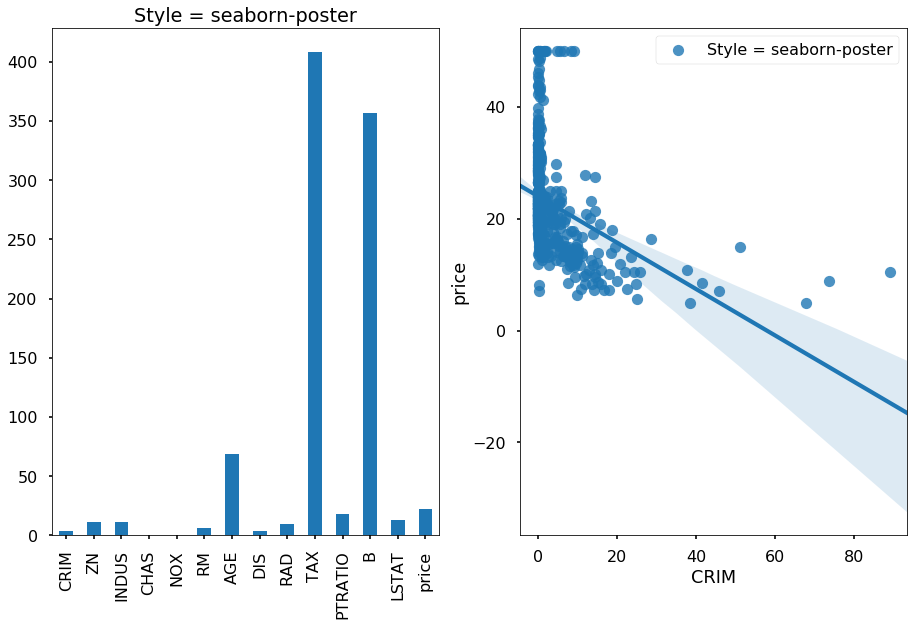

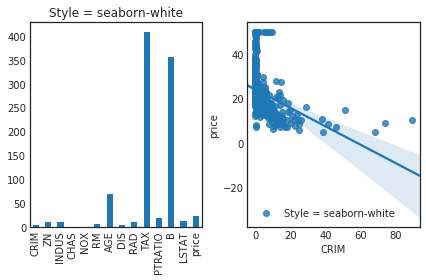

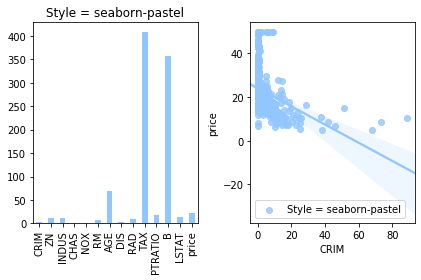

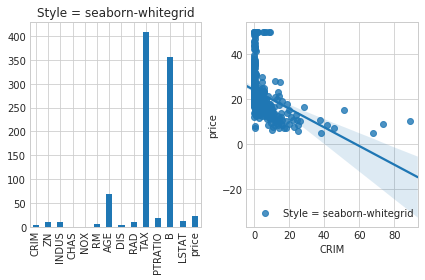

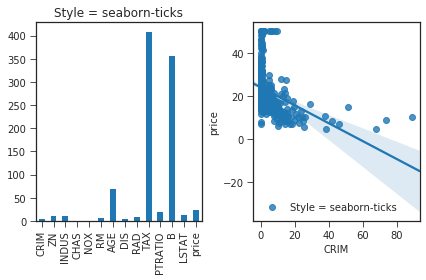

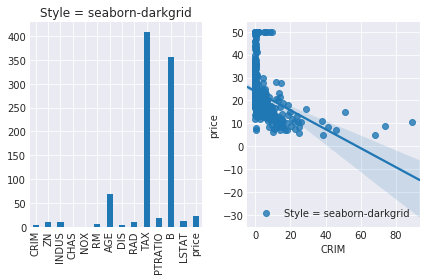

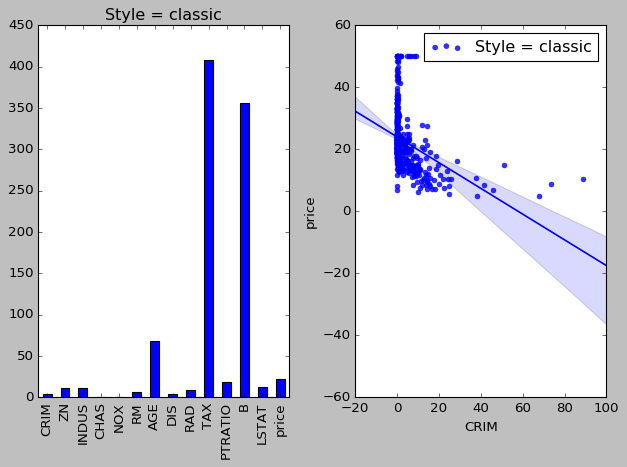

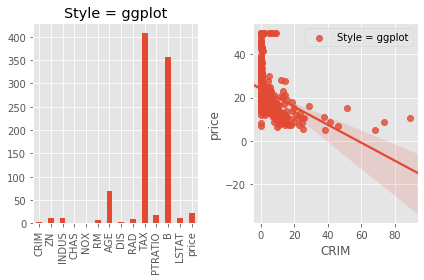

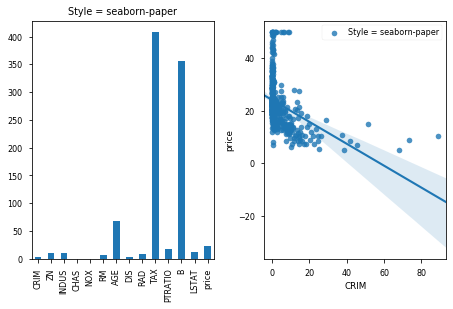

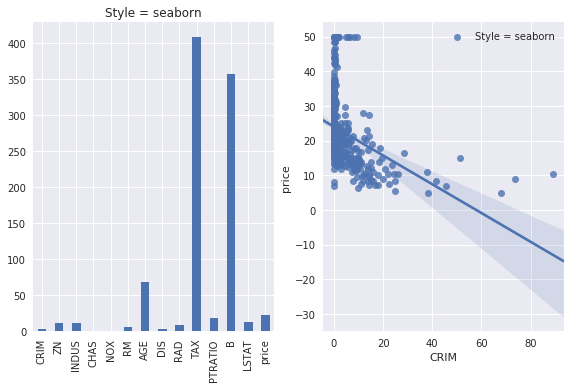

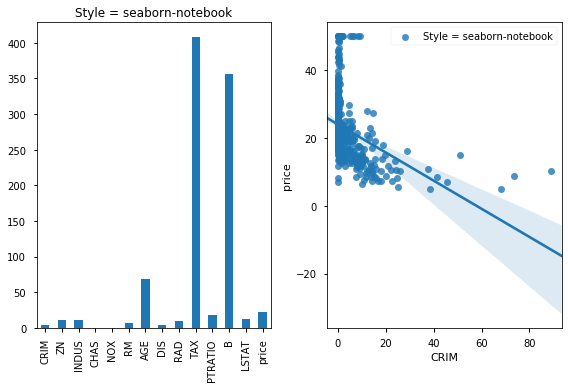

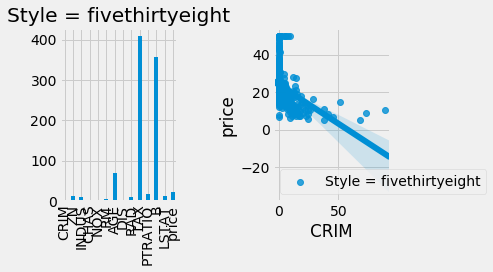

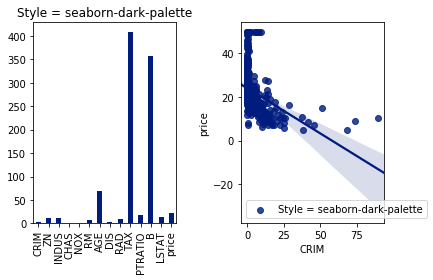

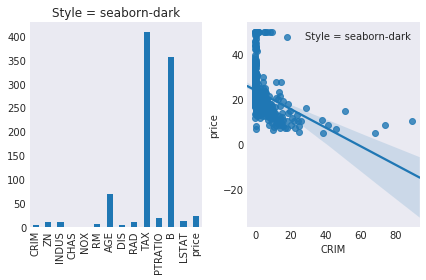

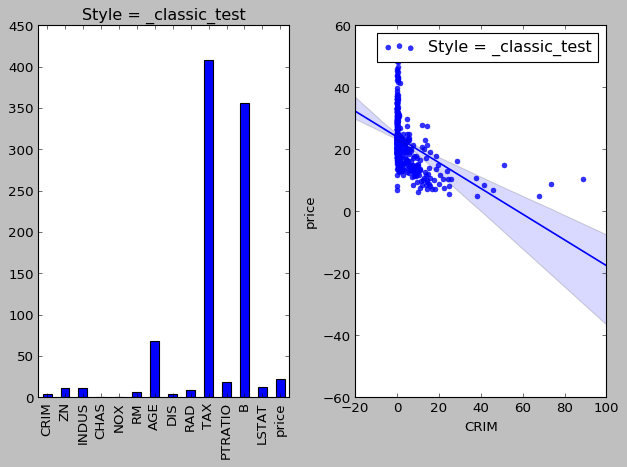

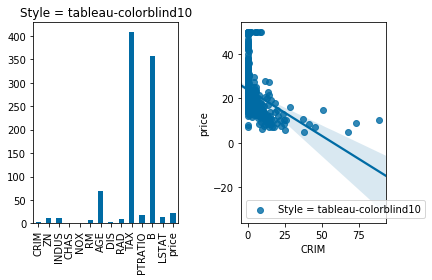

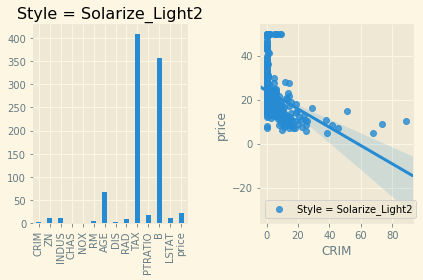

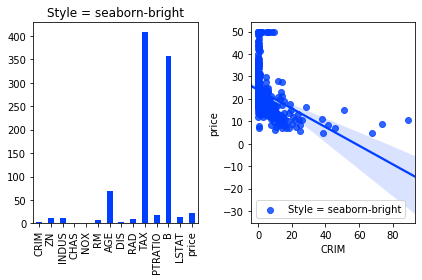

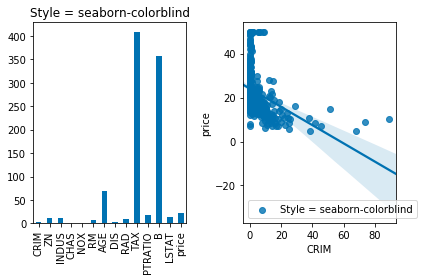

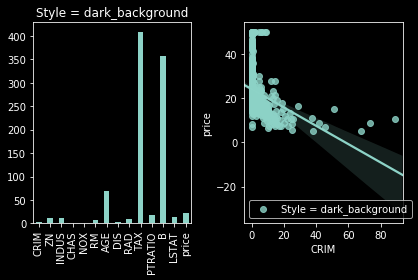

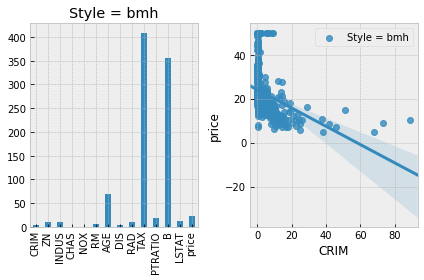

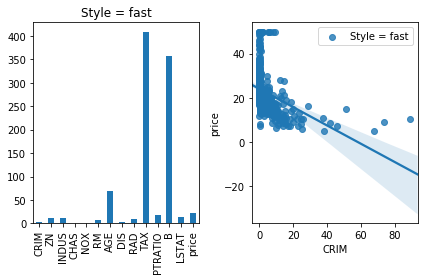

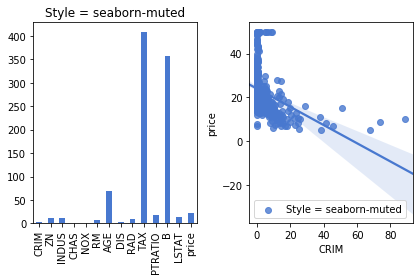

In [143]:
## Get list of styles 
style_names = plt.style.available

# Loop through style names
for style in style_names:
    
    # Use context manager to apply style to ONLY this figure
    with plt.style.context(style):
        
        fig,ax=plt.subplots(ncols=2)
        
        df.mean().plot(kind='bar',x='CRIM',y='price',ax=ax[0],)
        ax[0].set_title(f'Style = {style}')        
        
        sns.regplot(df['CRIM'],df['price'],ax=ax[1],label=f'Style = {style}')
        ax[1].legend()
        plt.tight_layout()


# Matplotlib.pyplot 
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
- Pyplot figures don't need to be created first. You can just call one of the plotting functions `plt.bar/plot/scatter/etc`
- Any `plt` commands entered in the same cell will happen on the same plot.

```python
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.hist(x)
plt.scatter(x,y)
plt.bar(x, height) #x= group/label, height = bar height/ y

```

- BUT if you want to specify figsize, you have to you create the figure first with `plt.figure(figsize=(W,H))` where width and height are numbers.

```python
fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
```



<BarContainer object of 14 artists>

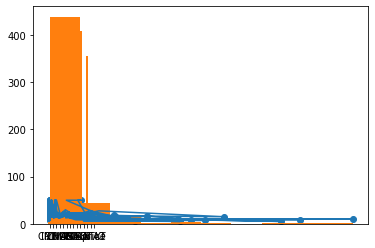

In [30]:
## Example of plt plots adding to the same figure
import matplotlib.pyplot as plt
x =df['CRIM']
y = df['price']

plt.plot(x,y)
plt.hist(x)
plt.scatter(x,y)

x = df.columns
height = df.mean()
plt.bar(x, height) #x= group/label, height = bar height/ y

CRIM         3.614
ZN          11.364
INDUS       11.137
CHAS         0.069
NOX          0.555
RM           6.285
AGE         68.575
DIS          3.795
RAD          9.549
TAX        408.237
PTRATIO     18.456
B          356.674
LSTAT       12.653
price       22.533
Name: mean, dtype: float64

'\n'

Text(0.5, 1.0, 'My Title')

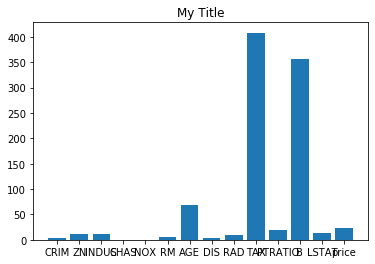

In [36]:
## Making a bar plot of feature mean values


# Save the describe output (which is a dataframe)
res = df.describe() .round(3)
display(res.loc['mean'],'\n')
# Get mean from the res dataframe
means = res.loc['mean'].values
# Save column names in a list
cols = res.columns

import matplotlib.pyplot as plt
# Feed in the x values (col name) and bar height/y
plt.bar(cols,means);
plt.title('My Title')

- We can customize the text properties for our labels using the `fontdict` parameter in our text/labeling functiopns 

    - font_dict is a dictionary with a keyword that specifies what property to change and a value for that property
    - [See this link for available properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html?highlight=text)

Notice that plt commands only out a Figure
<class 'matplotlib.figure.Figure'>


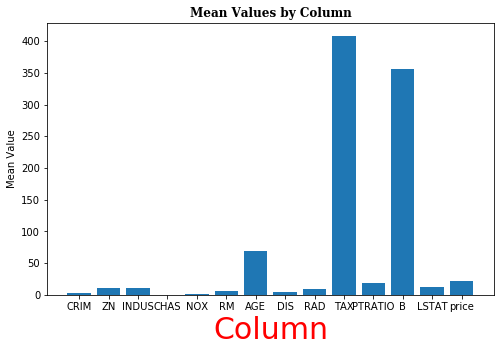

In [68]:
# To control size of figure, must create fig first 
fig= plt.figure(figsize=(8,5))
plt.bar(cols,means)


## Text can be styled by passing in a `fontdict=`
title_style ={'fontweight':'bold','fontfamily':'serif'} 
plt.title('Mean Values by Column',fontdict=title_style)

ax_font_style = {'fontweight':'light','rotation':90}
plt.ylabel('Mean Value',fontdict=ax_font_style)

## Can also create the dictionary in function call
plt.xlabel('Column',fontdict={'size':30,'color':'red'})

print('Notice that plt commands only out a Figure')
print(type(fig))

- Changing colors.
    - Matplotlib recognized many colors by name. [See this list for all named colors.](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
    - Use the `c=` parameter to specify color

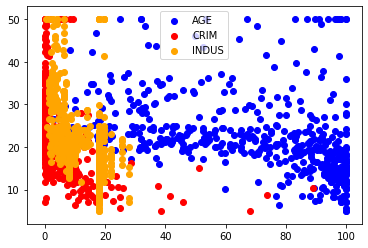

In [48]:
## Plotting scatter plot colors by column
color_cols = {'AGE':'blue','CRIM':'red', 'INDUS':'orange'}

for col, color in color_cols.items():
    y = df['price']
    x = df[col]

    plt.scatter(x,y,c=color,label=col)
    plt.legend()

## Matplotlib's Object-Oriented Interface
- Create new figures by using `fig,ax=plt.subplots()` to create a figure _first_
    - If do not specify `nrows` or `ncols` it produces one ax inside the figure.
    
    - If you create subplots by passing it more rows or columns, then ax becomes a *list* of the axes.
    `fig, axes = plt.subplots(ncols=2)`
    
- Plotting commands are then called directly by the `ax` as a method.
i.e. `ax.plot()`

- Adding text and styling is done via a different set of commands, which are also called directly by the `ax`, and start with `.set_`
- The command for setting the title changes from `plt.title` to `ax.set_title()`
- `ax.set_ylabel()`
- etc.


Notice the type of fig is Figure
<class 'matplotlib.figure.Figure'>

And the type for ax is an Axes
<class 'matplotlib.axes._subplots.AxesSubplot'>


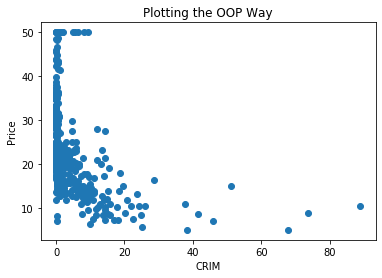

In [64]:
fig,ax = plt.subplots()
x=df['CRIM']
y=df['price']

ax.scatter(x,y)
ax.set_title('Plotting the OOP Way')
ax.set_ylabel('Price')
ax.set_xlabel('CRIM')

print('\nNotice the type of fig is Figure')
print(type(fig))

print('\nAnd the type for ax is an Axes')
print(type(ax))

## TO DO AS A GROUP:
- Why can't we mix them together without worry?


# Pandas


## Pandas & Seaborn




- *Matplotlib is the backbone of plotting in python.*<br> 
- Many packages ( `statsmodels`,`seaborn`,`pandas`,`plotly`) use a matplotlib backbone to make complex and aesthetically pleasing visuals.<br>
    - i.e. pandas `df.plot()/df.scatter()` are using matplotlib's .plot(), .scatter(), but wrapped 
    - i.e. seaborn's sns.regplot() is a matplotlib plt.scatter() and a plt.plot() line


Think about how many commands this would take if we did it directly in plt...


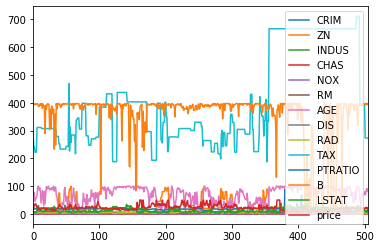

In [98]:
# Pandas does a LOT for us. 
df.plot()
print('Think about how many commands this would take if we did it directly in plt...')

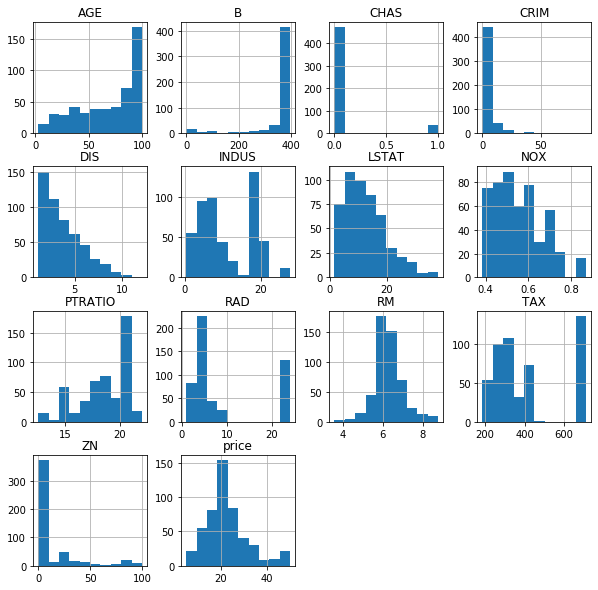

In [58]:
df.hist(figsize=(10,10));

Pandas does a lot for us, but if we want to customize the output, we need to catch the figure in a variable. 


Notice that fig is not a Figure, its an Axes


matplotlib.axes._subplots.AxesSubplot

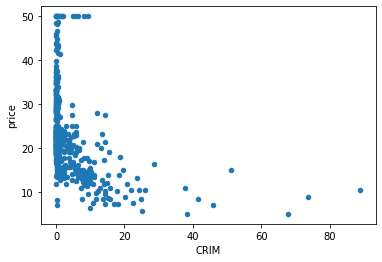

In [70]:
fig = df.plot(kind='scatter',x='CRIM',y='price')

print('\nNotice that fig is not a Figure, its an Axes')
type(fig)

### Why does it matter that Pandas returns an Axes instead of a Figure?

- Because we need to know which commands are available to customize it.

- Some commands work just fine like `title`.

- But others will not work properly (especially if theres subplots).

- Its best to use the OOP commands, as they will provide more powerful tools for customization using the `ax.set_` commands.

Text(0.5, 1.0, 'Test')

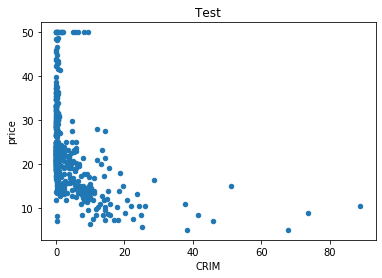

In [75]:
fig = df.plot(kind='scatter',x='CRIM',y='price')

Additionally, both pandas and seaborn plots accept an option `ax` command. So you can create an arrangment of plots using `fig, ax = plt.subplots(nrows=4,ncols=3)` and then fill in specific subplots with pandas plots and seaborn plots

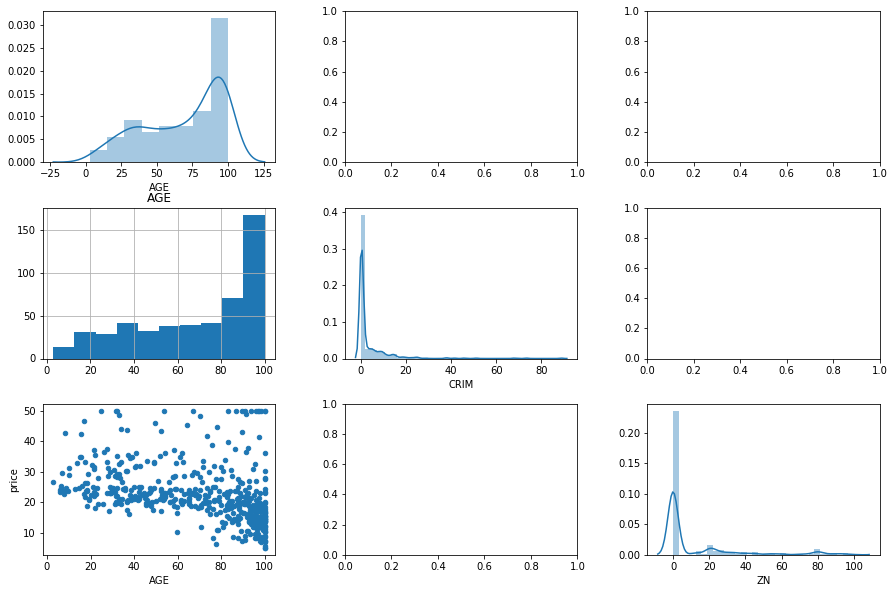

In [96]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,10))

sns.distplot(df['AGE'],ax=ax[0,0],label='AGE')
df.hist(column='AGE',ax=ax[1,0])
df.plot(kind='scatter',x='AGE',y='price',ax=ax[2,0])

sns.distplot(df['CRIM'],ax=ax[1,1], label='CRIM')

sns.distplot(df['ZN'],ax=ax[2,2], label='ZN')




### We will explore this as a group.